Moneyness feature created.
Data has been split into training and testing sets.

Starting model training...
Model training complete.

--- Evaluating Random Forest Performance on Test Set ---
R-Squared (R²):                  0.9986
Mean Absolute Error (MAE):     18.23
Mean Abs. Percentage Err (MAPE): 21.72%
Mean Squared Error (MSE):      1,058.17
Root Mean Squared Error (RMSE):  32.53
----------------------------------------------------------

--- Feature Importances ---
Moneyness                        0.879906
Volume                           0.047365
Underlying_Stock_Price_S         0.025501
Strike_Price_K                   0.020416
Time_period_t_in_days            0.011969
Open_Interest                    0.010652
Risk_Free_Rate_r                 0.002895
Historical_Volatility_40_days    0.000461
Historical_Volatility_30_days    0.000428
Historical_Volatility_20_days    0.000407
dtype: float64


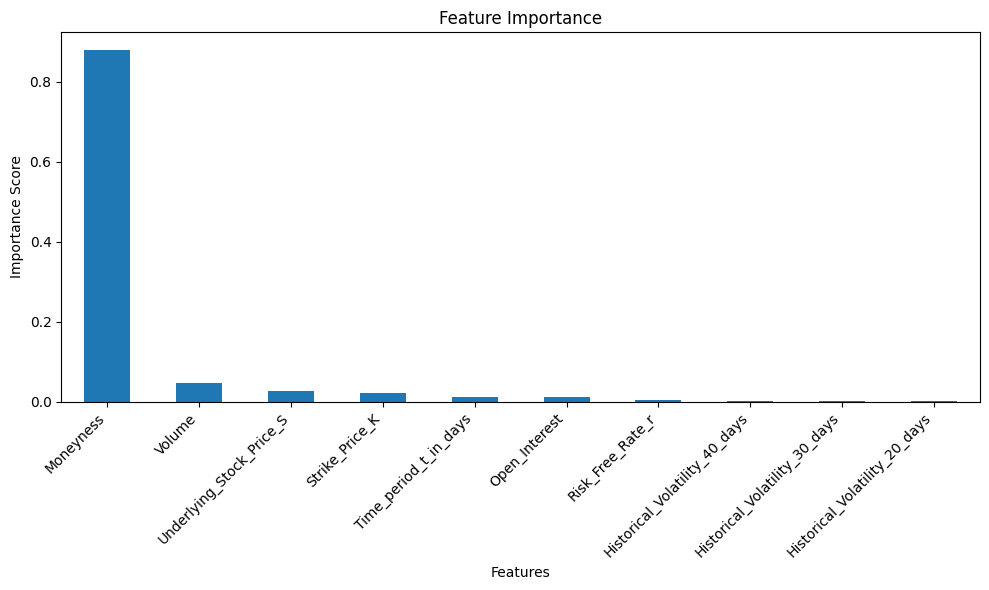

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# --- Custom Function for MAPE ---
# Using the same function for a consistent comparison
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by filtering out zero values in the actual prices
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# --- 1. Load the Data ---
df = pd.read_excel('Final_Without_IV_2.xlsx')

# --- 2. Feature Engineering: Add Moneyness ---
df['Moneyness'] = df['Underlying_Stock_Price_S'] / df['Strike_Price_K']
print("Moneyness feature created.")


# --- 3. Define Features (X) and Target (y) ---
y = df['Option_Price_C']
X = df.drop('Option_Price_C', axis=1)

# --- 4. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data has been split into training and testing sets.")

# --- 5. Initialize and Train the Random Forest Model ---
# Using optimized parameters
rf_model = RandomForestRegressor(n_estimators=500, max_features=0.75, random_state=42, n_jobs=-1, min_samples_leaf=2)

print("\nStarting model training...")
rf_model.fit(X_train, y_train)
print("Model training complete.")

# --- 6. Make Predictions and Evaluate the Model ---
print("\n--- Evaluating Random Forest Performance on Test Set ---")
predictions = rf_model.predict(X_test)

# --- EXPANDED EVALUATION: Calculate All Metrics ---
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print the comprehensive results
print(f"R-Squared (R²):                  {r2:.4f}")
print(f"Mean Absolute Error (MAE):     {mae:,.2f}")
print(f"Mean Abs. Percentage Err (MAPE): {mape:.2f}%")
print(f"Mean Squared Error (MSE):      {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:,.2f}")
print("----------------------------------------------------------\n")


# --- 7. Analyze and Plot Feature Importances ---
# Get importance scores from the trained model
importances = rf_model.feature_importances_

# Create a pandas Series for easy viewing
feature_names = X_train.columns
feature_importance_series = pd.Series(importances, index=feature_names)

# Sort the features by importance
sorted_importances = feature_importance_series.sort_values(ascending=False)

print("--- Feature Importances ---")
print(sorted_importances)

# Plot the feature importances for better visualization
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to make room for feature names
plt.show()